# MMM Forecast
Use this notebook to generate test results for MMM Forecast

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from mmm_forecast import CVMForecast, CATForecast
import util

In [3]:
train_date = '2021-09-13'
test_date = '2021-10-04'

## CVM Forecast

In [4]:
cvm_forecast = CVMForecast()

In [5]:
cvm_df = cvm_forecast.load_data()
cvm_df = cvm_forecast.preprocess_data(cvm_df)
cvm_dft, window, pred_date = cvm_forecast.truncate(cvm_df, train_date=train_date, test_date=test_date)

In [6]:
forecast_df = cvm_forecast.forecast(cvm_dft, window=window, coeff=0.8)
train_df, test_df = util.train_test_split(cvm_df, forecast_df)

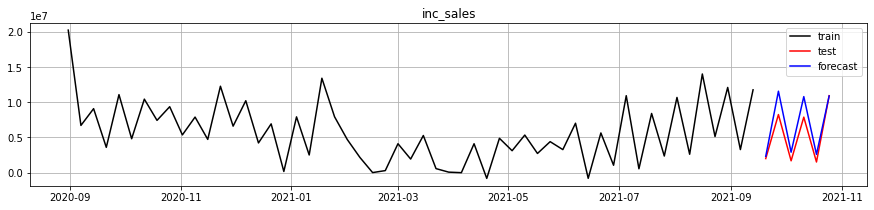

sMAPE = 15.551541376120372


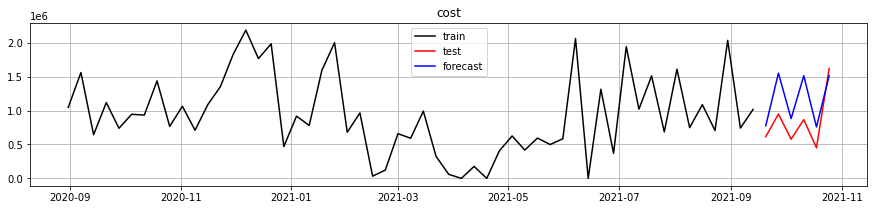

sMAPE = 18.7384687645601


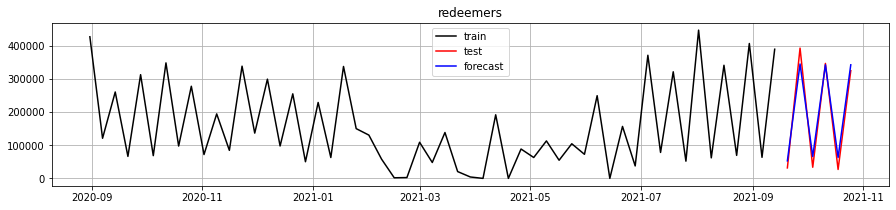

sMAPE = 17.948267898367014


In [7]:
weekly_forecast = util.get_weekly(forecast_df)
weekly_train = util.get_weekly(train_df)
weekly_test = util.get_weekly(test_df)

util.train_test_plot(weekly_train, weekly_test, weekly_forecast, 'weekly')

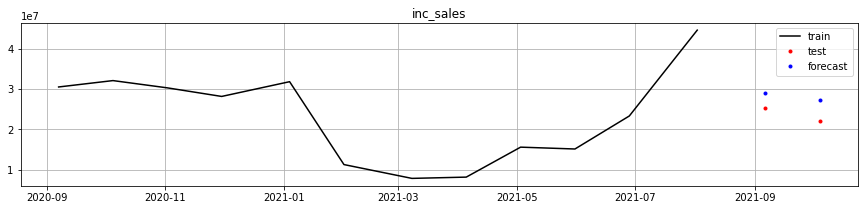

sMAPE = 8.627966025702026


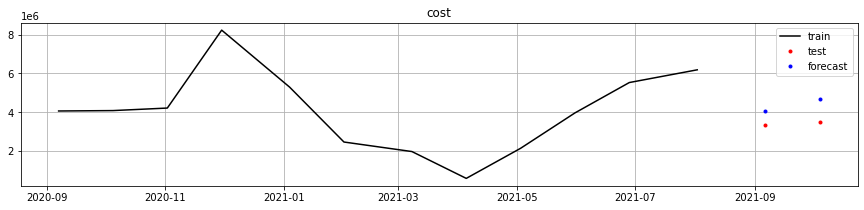

sMAPE = 12.177520417708546


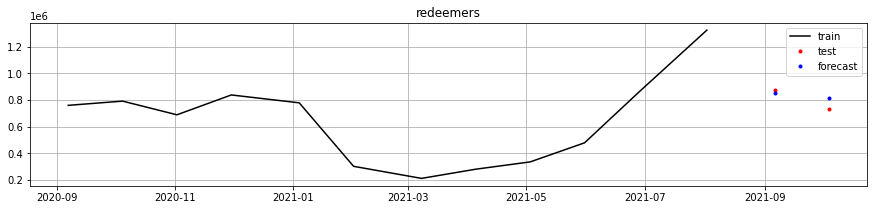

sMAPE = 3.424393176820705


In [8]:
monthly_forecast = util.get_monthly(forecast_df, test_date)
monthly_train = util.get_monthly(train_df, test_date)
monthly_test = util.get_monthly(test_df, test_date)

# manage overlap
monthly_forecast = util.manage_overlap(monthly_forecast, monthly_train)
monthly_test = util.manage_overlap(monthly_test, monthly_train)
monthly_train = monthly_train[~monthly_train.ds.isin(monthly_test.ds)]

util.train_test_plot(monthly_train, monthly_test, monthly_forecast, 'monthly')

### Comparison with marketing

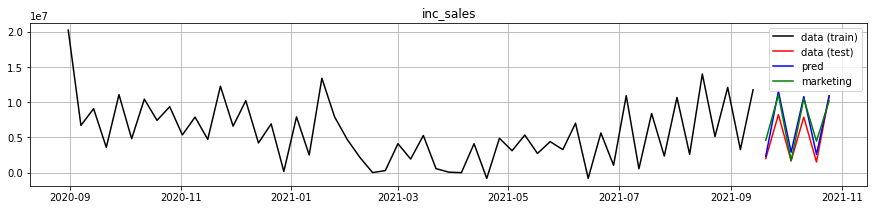

sMAPE (marketing) : 20.203625937651406
sMAPE (ours)      : 15.551541376120372


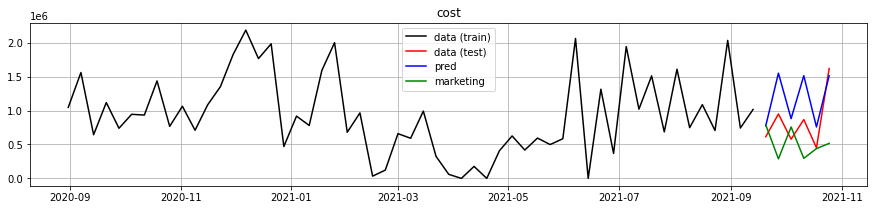

sMAPE (marketing) : 30.2674379385377
sMAPE (ours)      : 18.7384687645601


In [9]:
WINDOW = 6
metric = ['inc_sales', 'cost']
marketing_forecast = [
    [4593885, 11073884, 1677227,10501327,4468763,10213124],
    [788697,287873,757451,295084,439295,515855]
]

for i in range(2):
    
#     ds = weekly_test.ds[-WINDOW+2:]
#     y = weekly_test[metric[i]][-WINDOW+2:]
#     yhat = weekly_forecast[metric[i]][-WINDOW+2:]
#     z = marketing_forecast[i]
    
    ds = weekly_test.ds[-WINDOW:]
    y = weekly_test[metric[i]][-WINDOW:]
    yhat = weekly_forecast[metric[i]][-WINDOW:]
    z = marketing_forecast[i]
    
    plt.figure(figsize=(15,3))
    plt.title(metric[i])
    plt.plot(weekly_train.ds, weekly_train[metric[i]], label='data (train)', color='k')
    plt.plot(ds, y, label='data (test)', color='red')
    plt.plot(ds, yhat, label=f'pred', color='blue')
    plt.plot(ds, z, label=f'marketing', color='green')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'sMAPE (marketing) : {util.eval_smape(z, y)}')
    print(f'sMAPE (ours)      : {util.eval_smape(yhat, y)}')

## CAT Forecast

In [10]:
cat_forecast = CATForecast()

In [11]:
cat_df = cat_forecast.load_data()
cat_df = cat_forecast.preprocess_data(cat_df)
cat_dft, window, pred_date = cat_forecast.truncate(cat_df, train_date=train_date, test_date=test_date)

In [12]:
offer_pool = {
    datetime.date(2021, 9 , 20): [],
    datetime.date(2021, 9 , 27): [],
    datetime.date(2021, 10,  4): ['SG-005'],
    datetime.date(2021, 10, 11): ['SG-005'],
    datetime.date(2021, 10, 18): ['SG-001','SG-005'],
    datetime.date(2021, 10, 25): ['SG-001','SG-005'],
    datetime.date(2021, 11,  1): [],
    datetime.date(2021, 11,  8): [],
}

forecast_df = cat_forecast.forecast(cat_dft, window=window+1, coeff=.2, offer_pool=offer_pool, )
train_df, test_df = util.train_test_split(cat_df, forecast_df)

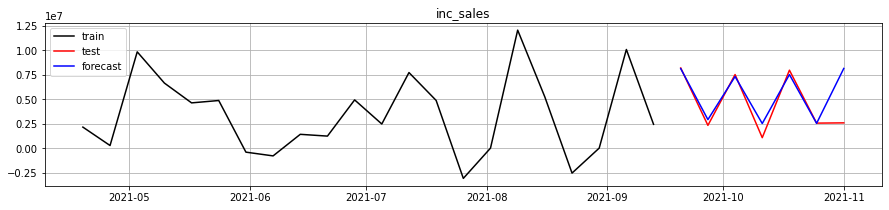

sMAPE = 15.524832449112807


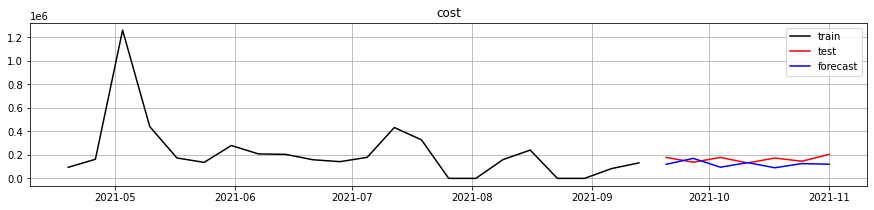

sMAPE = 18.056216690531418


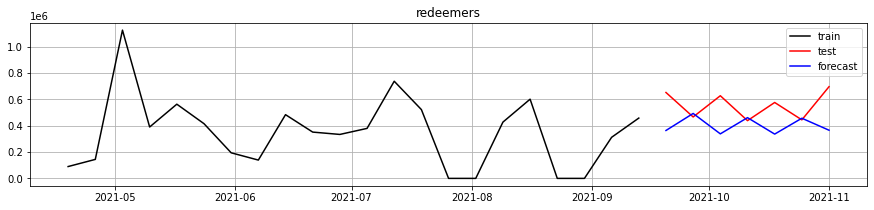

sMAPE = 17.49376192719712


In [13]:
weekly_forecast = util.get_weekly(forecast_df)
weekly_train = util.get_weekly(train_df)
weekly_test = util.get_weekly(test_df)

util.train_test_plot(weekly_train, weekly_test, weekly_forecast, 'weekly')

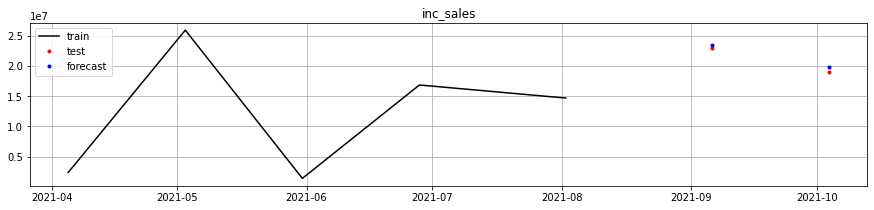

sMAPE = 1.5511847547416062


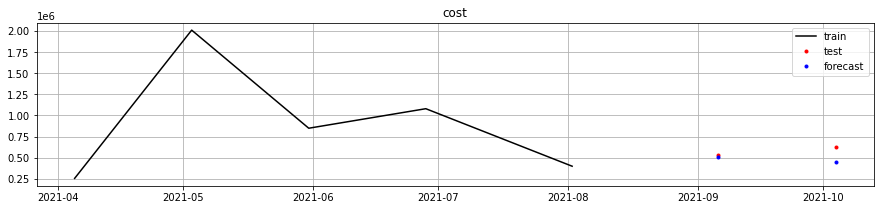

sMAPE = 9.761370738563983


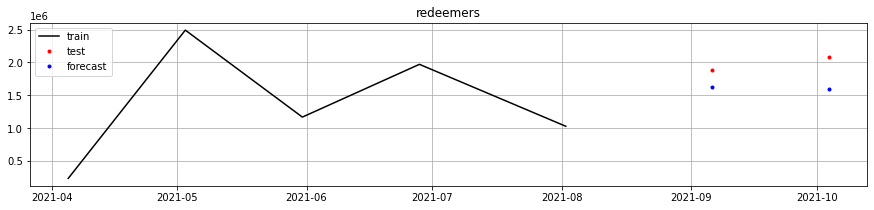

sMAPE = 10.442448884652794


In [14]:
monthly_forecast = util.get_monthly(forecast_df, test_date)
monthly_train = util.get_monthly(train_df, test_date)
monthly_test = util.get_monthly(test_df, test_date)

# manage overlap
monthly_forecast = util.manage_overlap(monthly_forecast, monthly_train)
monthly_test = util.manage_overlap(monthly_test, monthly_train)
monthly_train = monthly_train[~monthly_train.ds.isin(monthly_test.ds)]

util.train_test_plot(monthly_train, monthly_test, monthly_forecast, 'monthly')

### Comparison with marketing

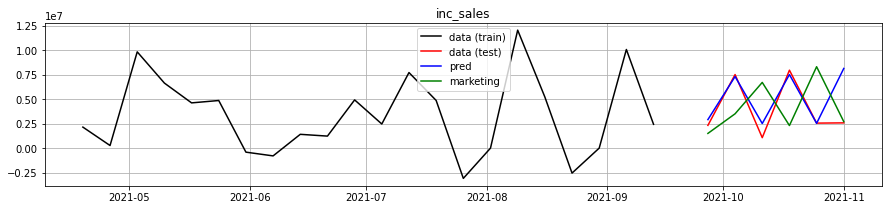

sMAPE (marketing) : 40.15502148018823
sMAPE (ours)      : 18.04377326262118


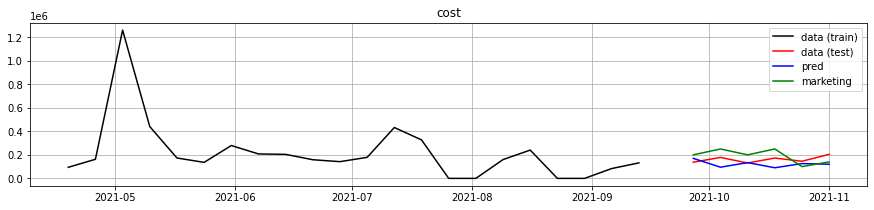

sMAPE (marketing) : 18.6067445367601
sMAPE (ours)      : 17.779909264484058


In [15]:
WINDOW = 6
metric = ['inc_sales', 'cost']
marketing_forecast = [
    [1500000,3500000,6700000,2300000,8300000,2700000],
    [200000,250000,200000,250000,100000,140000]
]

for i in range(2):
    
#     ds = weekly_test.ds[-WINDOW+2:]
#     y = weekly_test[metric[i]][-WINDOW+2:]
#     yhat = weekly_forecast[metric[i]][-WINDOW+2:]
#     z = marketing_forecast[i]

    ds = weekly_test.ds[-WINDOW:]
    y = weekly_test[metric[i]][-WINDOW:]
    yhat = weekly_forecast[metric[i]][-WINDOW:]
    z = marketing_forecast[i]

    plt.figure(figsize=(15,3))
    plt.title(metric[i])
    plt.plot(weekly_train.ds, weekly_train[metric[i]], label='data (train)', color='k')
    plt.plot(ds, y, label='data (test)', color='red')
    plt.plot(ds, yhat, label=f'pred', color='blue')
    plt.plot(ds, z, label=f'marketing', color='green')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'sMAPE (marketing) : {util.eval_smape(z, y)}')
    print(f'sMAPE (ours)      : {util.eval_smape(yhat, y)}')

## Ad-hoc analysis

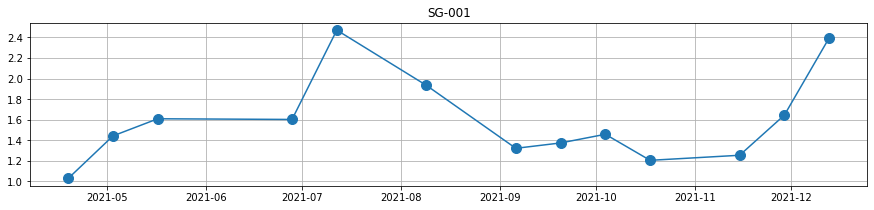

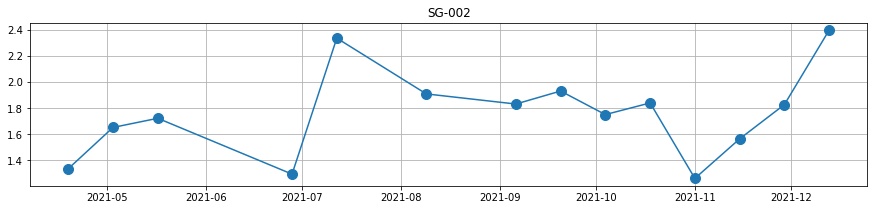

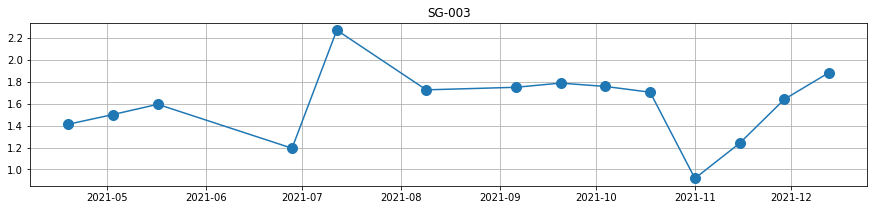

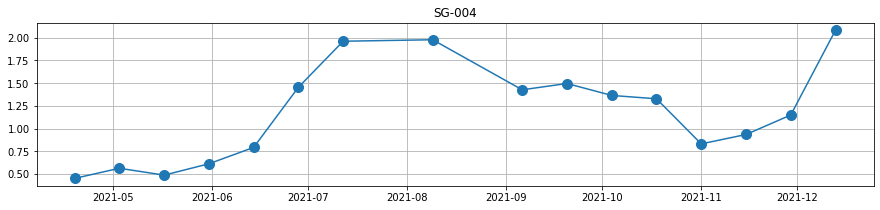

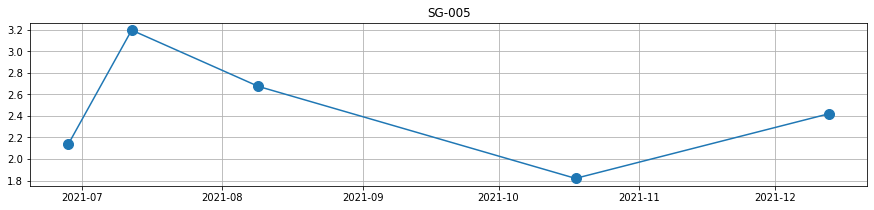

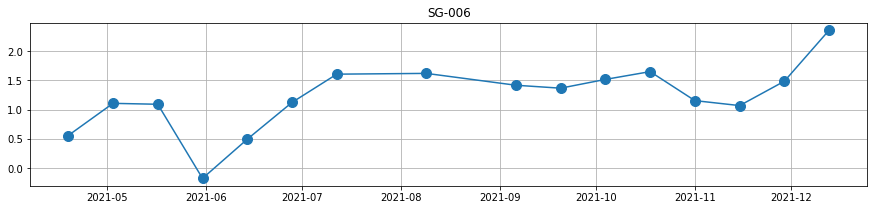

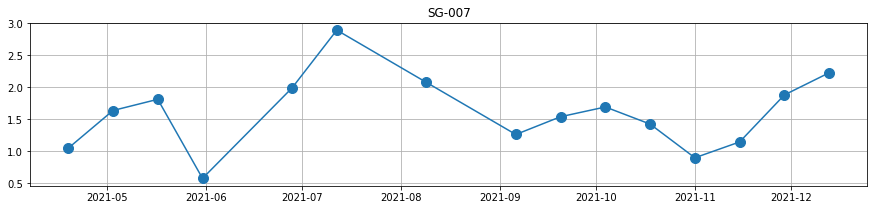

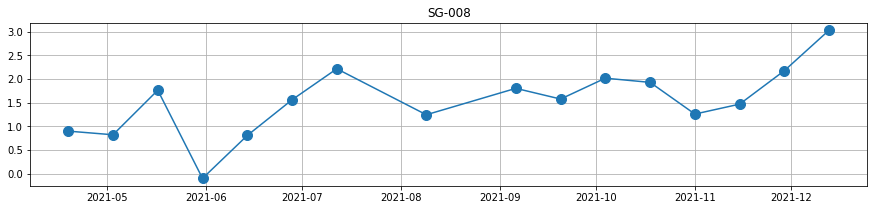

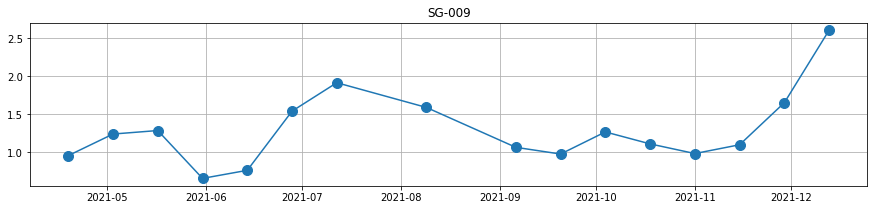

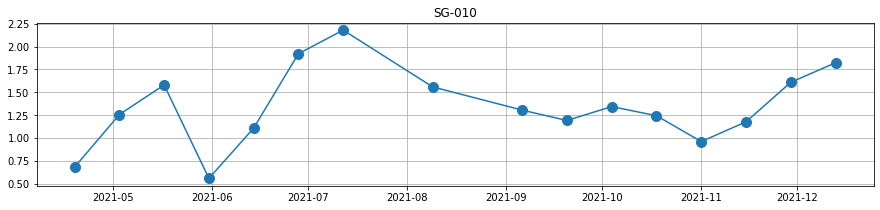

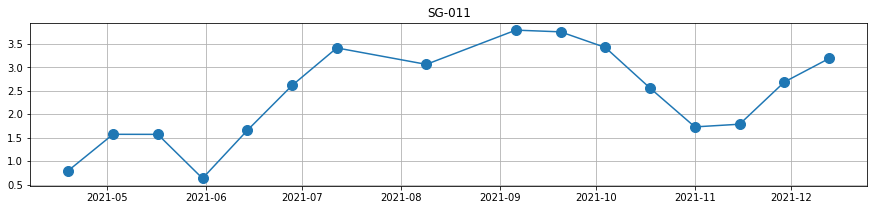

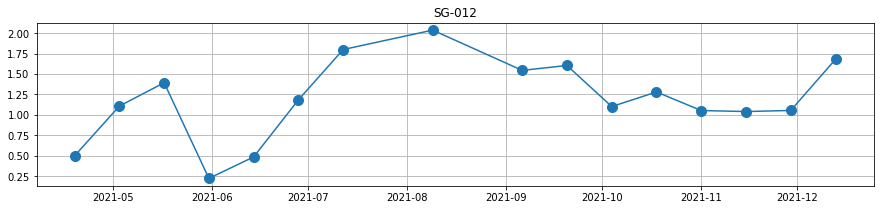

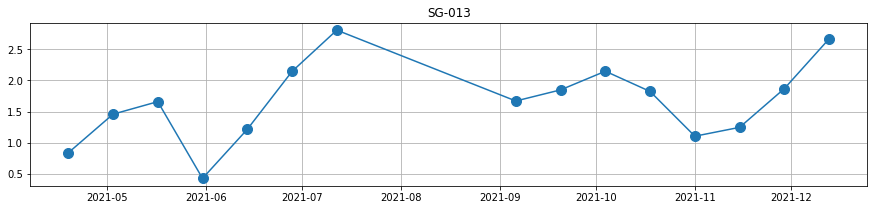

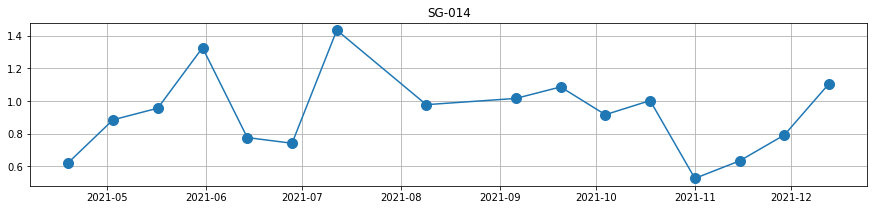

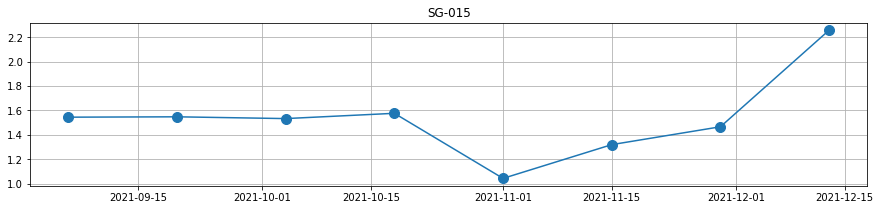

In [16]:
for offer_type in list(cat_df.offer_type.unique()):
    adhoc = cat_df[(cat_df.offer_type==offer_type) & (cat_df.campaign_week_nbr==1)]
    plt.figure(figsize=(15,3))
    plt.title(offer_type)
    plt.plot(adhoc.ds, adhoc.rpc, '.-', ms=20)
    plt.grid()
    plt.show()

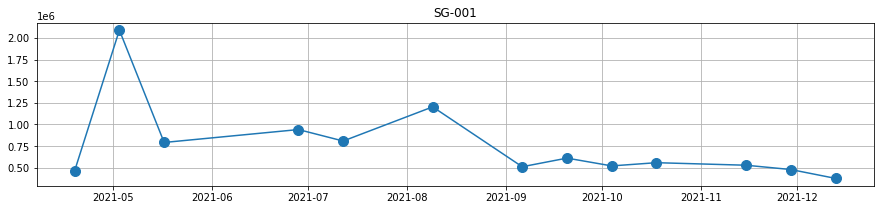

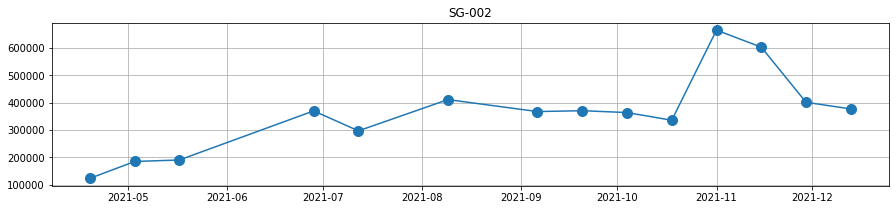

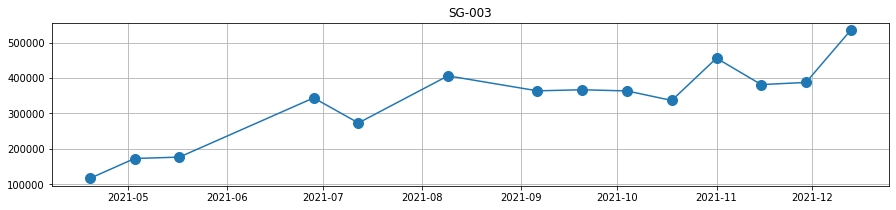

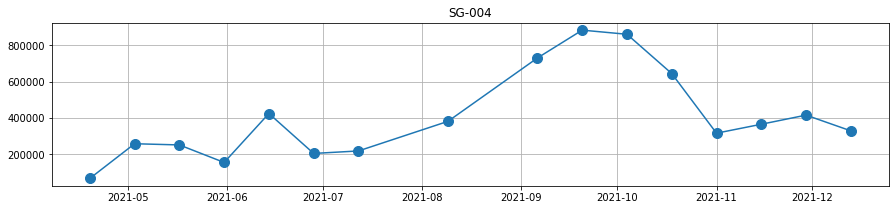

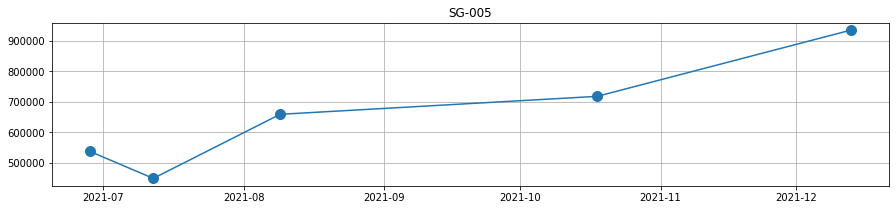

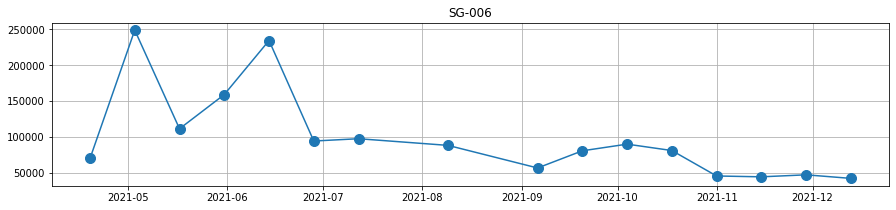

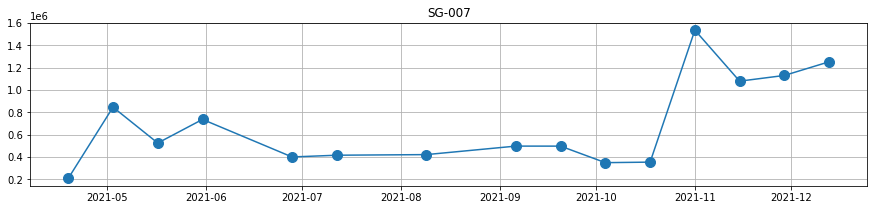

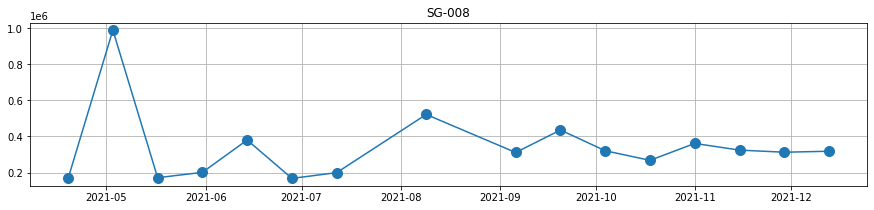

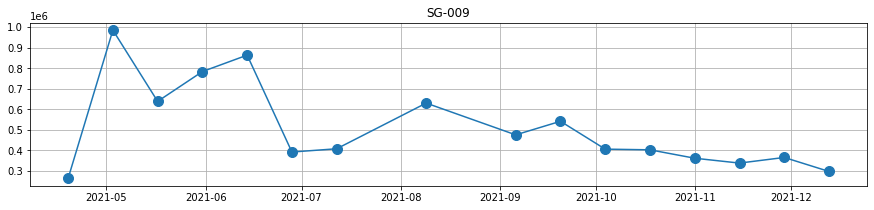

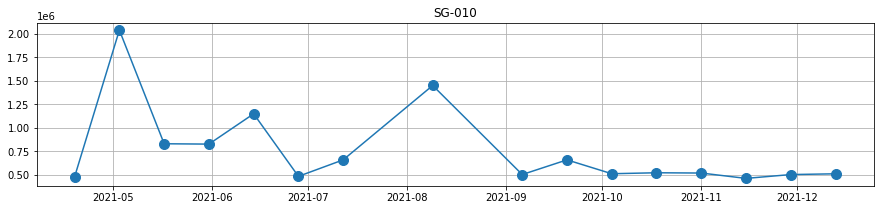

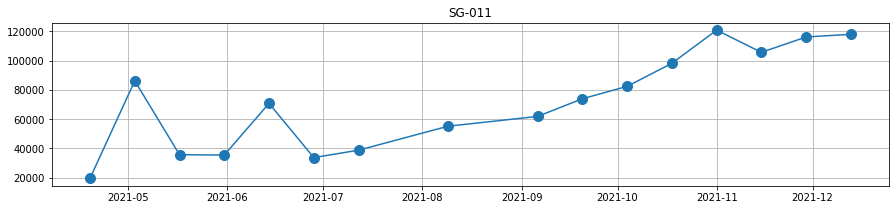

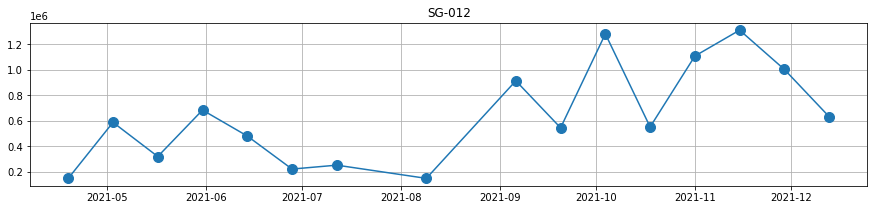

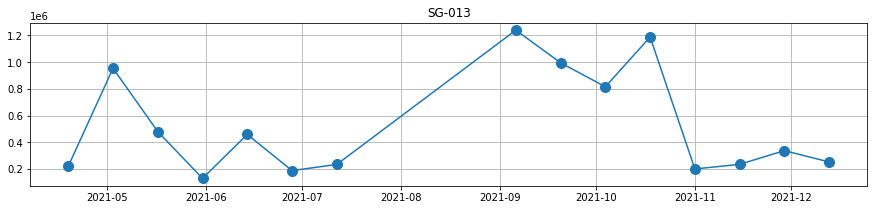

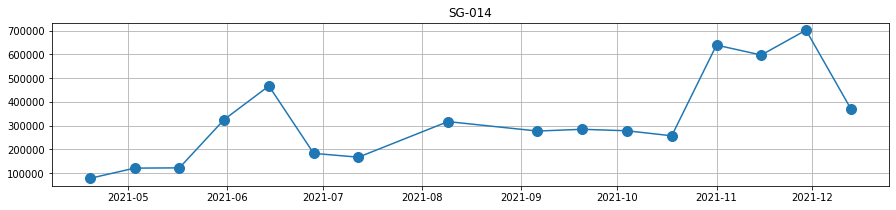

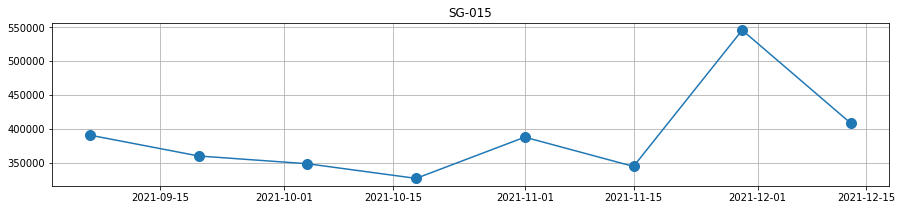

In [17]:
for offer_type in list(cat_df.offer_type.unique()):
    adhoc = cat_df[(cat_df.offer_type==offer_type) & (cat_df.campaign_week_nbr==1)]
    plt.figure(figsize=(15,3))
    plt.title(offer_type)
    plt.plot(adhoc.ds, adhoc.audience, '.-', ms=20)
    plt.grid()
    plt.show()